## About Encyclopaedia Britannica - Seventh Edition

Data format: digitised text

Data creation process: Optical Character Recognition (OCR)

Data source: https://data.nls.uk/

## Import

In [92]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
conda install -c anaconda nltk

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [94]:
conda install -c conda-forge wordcloud

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [95]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import wordnet
from nltk.tag import pos_tag
from nltk.text import Text
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import json

[nltk_data] Downloading package punkt to /Users/hekeren/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hekeren/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hekeren/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hekeren/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Clean

The seventh edition of the Encyclopaedia Britannica has 21 volumes, in addition to the index, which contain a very large number of words. And due to OCR, there are many errors. I cleaned up the data.

First I extracted all the English words of the 7th edition.

In [102]:
#Regular expressions represent words
english_words = re.compile("[a-zA-Z]+")

#Recognize English words 
def englishwords(some_strings):
    all_english_words = []
    for i in some_strings:
        matches = english_words.match(i)
        #fail to match
        if matches != None:             
            yesisenglish = matches.group()
            if wordnet.synsets(yesisenglish): 
                #https://blog.csdn.net/ltochange/article/details/117431933?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522163665155816780274126867%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=163665155816780274126867&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-6-117431933.first_rank_v2_pc_rank_v29&utm_term=wordnet&spm=1018.2226.3001.4187
                all_english_words.append(yesisenglish)
    return all_english_words

seventh_tokens  = englishwords(seventh_tokens)
seventh_tokens

['r',
 'it',
 'ENCYCLOPAEDIA',
 'SEVENTH',
 'EDITION',
 'ENCYCLOPAEDIA',
 'OR',
 'DICTIONARY',
 'ARTS',
 'SCIENCES',
 'GENERAL',
 'LITERATURE',
 'SEVENTH',
 'EDITION',
 'PRELIMINARY',
 'DISSERTATIONS',
 'ON',
 'HISTORY',
 'SCIENCES',
 'OTHER',
 'EXTENSIVE',
 'IMPROVEMENTS',
 'ADDITIONS',
 'INCLUDING',
 'LATE',
 'SUPPLEMENT',
 'A',
 'GENERAL',
 'INDEX',
 'NUMEROUS',
 'ENGRAVINGS',
 'VOLUME',
 'XII',
 'ADAM',
 'CHARLES',
 'BLACK',
 'EDINBURGH',
 'M',
 'XLII',
 'ENCYCLOPEDIA',
 'BRITANNIC',
 'A',
 'HYDRODYNAMICS',
 'History',
 'water',
 'v',
 'power',
 'is',
 'properly',
 'science',
 'Definition',
 'treats',
 'power',
 'water',
 'it',
 'acts',
 'by',
 'pressure',
 'or',
 'by',
 'impulse',
 'In',
 'its',
 'more',
 'enlarged',
 'acceptation',
 'ever',
 'it',
 'treats',
 'pressure',
 'equilibrium',
 'cohesion',
 'motion',
 'fluids',
 'machines',
 'by',
 'water',
 'is',
 'raised',
 'or',
 'in',
 'fluid',
 'is',
 'employed',
 'as',
 'first',
 'mover',
 'Hydrodynamics',
 'is',
 'divided',
 'two

Delete all stopwords

In [103]:
#all the stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [105]:
#remove all the stopwords
en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)
    return result

seventh_tokens = remove_stopwords(seventh_tokens)
seventh_tokens

['r',
 'ENCYCLOPAEDIA',
 'SEVENTH',
 'EDITION',
 'ENCYCLOPAEDIA',
 'OR',
 'DICTIONARY',
 'ARTS',
 'SCIENCES',
 'GENERAL',
 'LITERATURE',
 'SEVENTH',
 'EDITION',
 'PRELIMINARY',
 'DISSERTATIONS',
 'ON',
 'HISTORY',
 'SCIENCES',
 'OTHER',
 'EXTENSIVE',
 'IMPROVEMENTS',
 'ADDITIONS',
 'INCLUDING',
 'LATE',
 'SUPPLEMENT',
 'A',
 'GENERAL',
 'INDEX',
 'NUMEROUS',
 'ENGRAVINGS',
 'VOLUME',
 'XII',
 'ADAM',
 'CHARLES',
 'BLACK',
 'EDINBURGH',
 'M',
 'XLII',
 'ENCYCLOPEDIA',
 'BRITANNIC',
 'A',
 'HYDRODYNAMICS',
 'History',
 'water',
 'v',
 'power',
 'properly',
 'science',
 'Definition',
 'treats',
 'power',
 'water',
 'acts',
 'pressure',
 'impulse',
 'In',
 'enlarged',
 'acceptation',
 'ever',
 'treats',
 'pressure',
 'equilibrium',
 'cohesion',
 'motion',
 'fluids',
 'machines',
 'water',
 'raised',
 'fluid',
 'employed',
 'first',
 'mover',
 'Hydrodynamics',
 'divided',
 'two',
 'Hydrostatics',
 'Hydraulics',
 'Hydrostatics',
 'comprehends',
 'pressure',
 'equilibrium',
 'cohesion',
 'flu

Change all upper case letters to lower case to facilitate subsequent statistics

In [106]:
#lowercase
seventh_tokens_low = [t.lower() for t in seventh_tokens]
seventh_tokens_low

['r',
 'encyclopaedia',
 'seventh',
 'edition',
 'encyclopaedia',
 'or',
 'dictionary',
 'arts',
 'sciences',
 'general',
 'literature',
 'seventh',
 'edition',
 'preliminary',
 'dissertations',
 'on',
 'history',
 'sciences',
 'other',
 'extensive',
 'improvements',
 'additions',
 'including',
 'late',
 'supplement',
 'a',
 'general',
 'index',
 'numerous',
 'engravings',
 'volume',
 'xii',
 'adam',
 'charles',
 'black',
 'edinburgh',
 'm',
 'xlii',
 'encyclopedia',
 'britannic',
 'a',
 'hydrodynamics',
 'history',
 'water',
 'v',
 'power',
 'properly',
 'science',
 'definition',
 'treats',
 'power',
 'water',
 'acts',
 'pressure',
 'impulse',
 'in',
 'enlarged',
 'acceptation',
 'ever',
 'treats',
 'pressure',
 'equilibrium',
 'cohesion',
 'motion',
 'fluids',
 'machines',
 'water',
 'raised',
 'fluid',
 'employed',
 'first',
 'mover',
 'hydrodynamics',
 'divided',
 'two',
 'hydrostatics',
 'hydraulics',
 'hydrostatics',
 'comprehends',
 'pressure',
 'equilibrium',
 'cohesion',
 'flu

Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words.

In [107]:
#https://machinelearningknowledge.ai/11-techniques-of-text-preprocessing-using-nltk-in-python/
#lemmatization
def lemmatization(text):
    result = []
    wnl = WordNetLemmatizer()
    for token, tag in pos_tag(text):
        pos = tag[0].lower()
        if pos not in ['a','n','v','r']:
            pos = 'n'
        result.append(wnl.lemmatize(token,pos))
    return result

seventh_tokens_le = lemmatization(seventh_tokens_low)
seventh_tokens_le

['r',
 'encyclopaedia',
 'seventh',
 'edition',
 'encyclopaedia',
 'or',
 'dictionary',
 'art',
 'science',
 'general',
 'literature',
 'seventh',
 'edition',
 'preliminary',
 'dissertation',
 'on',
 'history',
 'science',
 'other',
 'extensive',
 'improvement',
 'addition',
 'include',
 'late',
 'supplement',
 'a',
 'general',
 'index',
 'numerous',
 'engraving',
 'volume',
 'xii',
 'adam',
 'charles',
 'black',
 'edinburgh',
 'm',
 'xlii',
 'encyclopedia',
 'britannic',
 'a',
 'hydrodynamics',
 'history',
 'water',
 'v',
 'power',
 'properly',
 'science',
 'definition',
 'treat',
 'power',
 'water',
 'act',
 'pressure',
 'impulse',
 'in',
 'enlarged',
 'acceptation',
 'ever',
 'treat',
 'pressure',
 'equilibrium',
 'cohesion',
 'motion',
 'fluid',
 'machine',
 'water',
 'raise',
 'fluid',
 'employ',
 'first',
 'mover',
 'hydrodynamics',
 'divide',
 'two',
 'hydrostatics',
 'hydraulics',
 'hydrostatics',
 'comprehends',
 'pressure',
 'equilibrium',
 'cohesion',
 'fluid',
 'motion',
 '

In [108]:
#counting
result = pd.value_counts(seventh_tokens_le) 
result

one           55305
it            50979
in            41890
make          40511
two           39811
              ...  
foxglove          1
porphyra          1
flashed           1
unofficial        1
tanners           1
Length: 45066, dtype: int64

After counting the number, I found that there were many unnecessary words, such as one-letter words and two-letter words, and I am now deleting these

In [109]:
# Filter one-letter words, two-letter words
one_two_letters = [i for i in seventh_tokens_le if len(i) > 2]
three_letters = ['one', 'also', 'per', 'many', 'may', 'two', 'but']
seventh_remain = [i for i in seventh_tokens_le if len(i)>2 and not i in three_letters]

seventh_remain

['encyclopaedia',
 'seventh',
 'edition',
 'encyclopaedia',
 'dictionary',
 'art',
 'science',
 'general',
 'literature',
 'seventh',
 'edition',
 'preliminary',
 'dissertation',
 'history',
 'science',
 'other',
 'extensive',
 'improvement',
 'addition',
 'include',
 'late',
 'supplement',
 'general',
 'index',
 'numerous',
 'engraving',
 'volume',
 'xii',
 'adam',
 'charles',
 'black',
 'edinburgh',
 'xlii',
 'encyclopedia',
 'britannic',
 'hydrodynamics',
 'history',
 'water',
 'power',
 'properly',
 'science',
 'definition',
 'treat',
 'power',
 'water',
 'act',
 'pressure',
 'impulse',
 'enlarged',
 'acceptation',
 'ever',
 'treat',
 'pressure',
 'equilibrium',
 'cohesion',
 'motion',
 'fluid',
 'machine',
 'water',
 'raise',
 'fluid',
 'employ',
 'first',
 'mover',
 'hydrodynamics',
 'divide',
 'hydrostatics',
 'hydraulics',
 'hydrostatics',
 'comprehends',
 'pressure',
 'equilibrium',
 'cohesion',
 'fluid',
 'motion',
 'together',
 'machine',
 'chiefly',
 'concerned',
 'history'

In [121]:
#counting
result = pd.value_counts(seventh_remain) 
result

make          40511
part          38721
time          35406
great         35303
year          32101
              ...  
vulgarize         1
unconfused        1
oblivious         1
polska            1
voided            1
Length: 44741, dtype: int64

In [111]:
result.to_csv("words.csv")

## Explore

After cleaning the data, it is assumed that most of the data has been cleaned up. Start the exploration of the data

#### What words appear more frequently

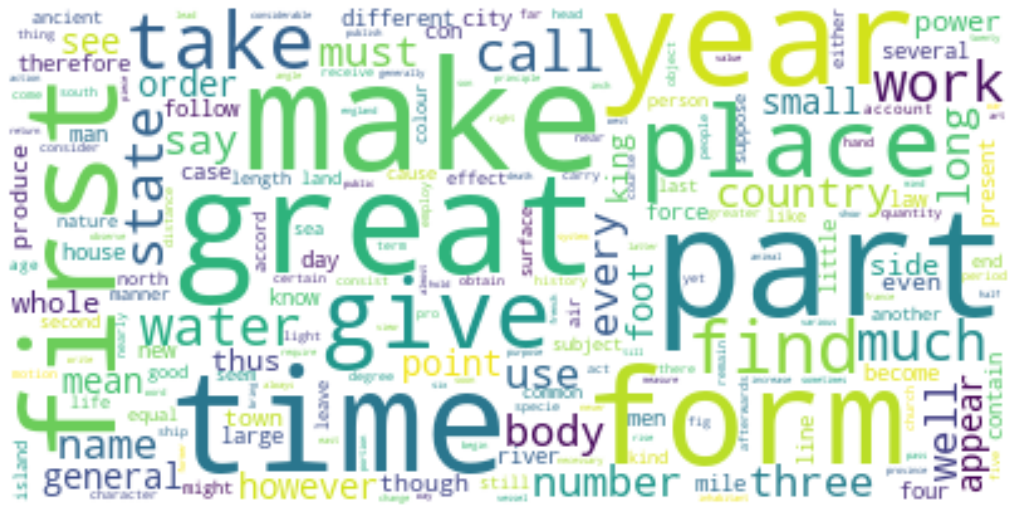

In [112]:
#wordcloud
from collections import Counter
dictionary=Counter(seventh_remain)
from wordcloud import WordCloud

cloud = WordCloud(max_font_size=60, background_color='white').generate_from_frequencies(dictionary)
plt.figure(figsize=(18,10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Using wordcloud, it is not possible to visually discover the frequency of some words. One can only roughly determine, based on the size of the words, which words are used more frequently.

In [113]:
#http://librarycarpentry.org/lc-tdm/09-frequency-distributions/index.html
#Count the number of occurrences of the word
seventh_freqdist = FreqDist(seventh_remain)

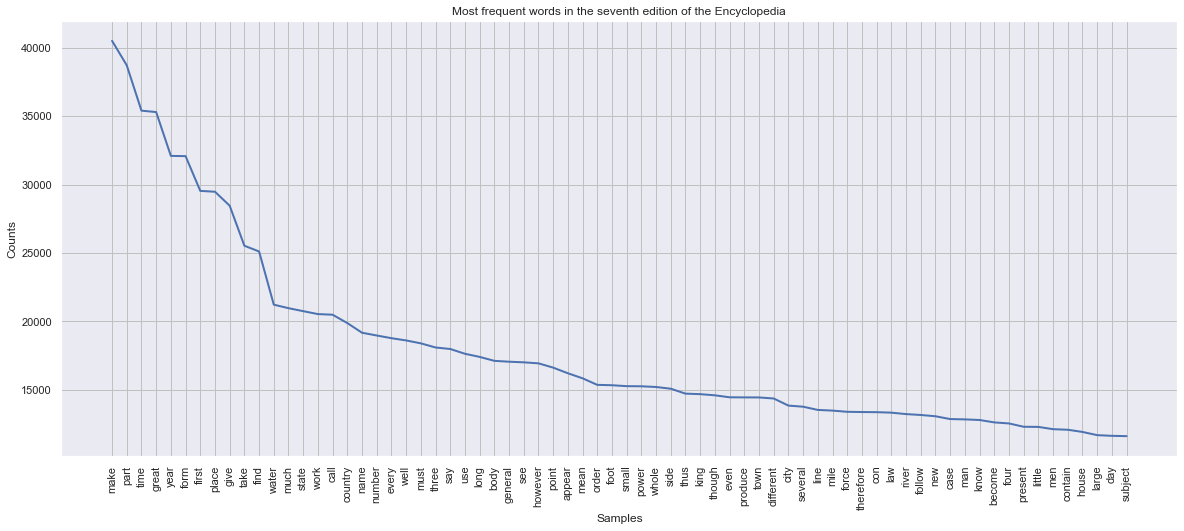

<AxesSubplot:title={'center':'Most frequent words in the seventh edition of the Encyclopedia'}, xlabel='Samples', ylabel='Counts'>

In [114]:
#A line graph showing the top 60 words with the highest frequency
plt.figure(figsize = (20, 8))
plt.rc('font', size=12)

number_of_tokens=70
seventh_freqdist.plot(number_of_tokens, title='Most frequent words in the seventh edition of the Encyclopedia')

A line graph was used to see the size distribution of the words. 

It can be seen that "make" and "part" are the most frequently used, while "water" also has a high proportion, which I suspect that the category "resource" may appear in the encyclopaedia.

The number of references to “law” is also high, I suspect because law as a subject is often mentioned as a more important part of a country.

It is interesting to note that "man" also appears highly, whereas "woman", on the other hand, does not appear in the chart. This may be due to the fact that women are not well documented in history, perhaps due to gender discrimination, or because they did not play a significant role in the progress of society.

Words with more geographical locations appear: "country", "town", "city", "river " etc., probably because many descriptions exist that introduce geographical areas.

Next I will use visualisation to get some conclusions based on what I have found in this chart.